<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

# Импорты

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import random
import pickle
import json
import phik


RANDOM_STATE = 42


warnings.filterwarnings("ignore")
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Ответ:` Фиксируем ГСЧ под капотом используемых библиотек для воспроизводимости результатов расчетов.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

# Добавим датасетам имена для удобства итерации по ним
df_train.attrs['Name'] = "Тренировочная выборка"
df_test.attrs['Name'] = "Тестовая выборка"

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
for df in [df_train, df_test]:
    print(df.attrs['Name'])
    display(df.head())

Тренировочная выборка


name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

Тестовая выборка


name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [5]:
## Обработку для max_power сделал дальше
# for i in range(0, len(df_train)):
#   try:
#     ffil_value = float(df_train.loc[i, 'max_power'][:-4])
#     df_train.loc[i, 'max_power'] = ffil_value

#   except:
#     if df_train.loc[i, 'max_power'] in [np.nan, 'nan']:
#       continue
#     elif df_train.loc[i, 'max_power'] == '0':
#       ffil_value = float(df_train.loc[i, 'max_power'])
#       df_train.loc[i, 'max_power'] = ffil_value
#     else:
#       df_train.loc[i, 'max_power'] = 0

In [6]:
for df in [df_train, df_test]:
    print(f"{df.attrs['Name']}, пропуски в признаках:")
    display(df.isna().sum())
    print(f"Признаки с пропусками: {df.columns[df.isna().sum() != 0].to_list()}\n")

Тренировочная выборка, пропуски в признаках:


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Признаки с пропусками: ['mileage', 'engine', 'max_power', 'torque', 'seats']

Тестовая выборка, пропуски в признаках:


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Признаки с пропусками: ['mileage', 'engine', 'max_power', 'torque', 'seats']



In [7]:
print("Количество полных дубликатов в тренировочной выборке", df_train.duplicated().sum())
print("Количество полных дубликатов в тeстовой выборке", df_test.duplicated().sum())

Количество полных дубликатов в тренировочной выборке 985
Количество полных дубликатов в тeстовой выборке 62


In [8]:
ProfileReport(df_train, title="Pandas Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 136999.88it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*Вывод по первичному анализу:*
* `name` - название автомобиля, 1924 уникальных марки, для обучения бесполезна, однако, может быть полезна при заполнении некоторых пропусков в данных;
* `year` - год выпуска автомобиля, в датасете представлены автомобили 1983 - 2020 года выпуска, наблюдается смещенное распределение вправо, и малое число объектов года выпуска менее чем 1995;
* `selling_price` - цена продажи автомобиля, от 29999 до 10000000, наблюдается асимметричное правостороннее распределение, и очень большое значение цены продажи, возможную причину оценим по подобным маркам;
* `km_driven` - пробег, принимает значения от 1 до 2360457, наблюдается асимметричное правостороннее распределение;
* `fuel` - тип топлива автомобиля, всего 4 типа, однако, два из них представлены в значительно меньшей степени (52 и 34 объекта), это стоит учесть для тестовой выборки (их в ней может не оказаться);
* `seller_type` - кто продает автомобиль, большинство объектов продает бывший владелец, стоит ометить, что в тренировочной выборке всего 206 объектов типа "Trusmark ...", стоит это учесть при работе с тестовой выборкой;
* `transmission` - тип коробки передач автомобиля, всего 2 неравномерно распределенные категории (ручная 6095 против авто 904); 
* `owner` - число предыдущих владельцев автомобиля, большая часть объектов - новые автомобили, присутствуют малозначительные категории 144 и 4 объекта, стоит это учесть при работе с тестовой выборкой; 
* `mileage` - расход топлива, имеет пропуски и распознан как объектовый признак, так как указаны разные единицы измерения, преобразуем его в числовой с их учетом;
* `engine` - рабочий объем двигателя, имеет пропуски и распознан как объектовый признак, возможно, указаны разные единицы измерения, преобразуем его в числовой с их учетом; 
* `max_power` - мощность автомобиля, имеет пропуски и распознан как объектовый признак, возможно, указаны разные единицы измерения, преобразуем его в числовой с их учетом; 
* `torque` - вращательный момент, имеет пропуски и распознан как объектовый признак, возможно, указаны разные единицы измерения, преобразуем его в числовой с их учетом;
* `seats` - число пассажирских сидений в автомобиле, в диапазоне от 2 до 14 мест, имеет пропуски.

`Комментарий студента:` переместил 4ый пункт на место перед исследованием числовых/категориальных статистик датасета ("Можно" - @Сабрина), так как иначе оно будет не объективным (несколько числовых столбцов - объекты из-за единиц измерения).

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [9]:
for df in [df_train, df_test]:
    print(df.attrs['Name'])
    for col in ['mileage', 'engine', 'max_power']:
        print("Уникальные единицы измерения колонки", col, ":", df[col].str.split(' ', n = 1, expand = True)[1].unique())
    print()

Тренировочная выборка
Уникальные единицы измерения колонки mileage : ['kmpl' 'km/kg' nan]
Уникальные единицы измерения колонки engine : ['CC' nan]
Уникальные единицы измерения колонки max_power : ['bhp' nan None]

Тестовая выборка
Уникальные единицы измерения колонки mileage : ['kmpl' nan 'km/kg']
Уникальные единицы измерения колонки engine : ['CC' nan]
Уникальные единицы измерения колонки max_power : ['bhp' nan]



In [10]:
for df in [df_train, df_test]:
    for col in ['mileage', 'engine', 'max_power']:
        df[col] = pd.to_numeric(df[col].str.split(' ', n = 1, expand = True)[0], errors='coerce')

In [11]:
def clean_torque(text):
    try:
        text = text.lower()
    except:
        return np.nan, np.nan
    # Удаляем ненужные символы
    text = text.replace("~", "-")
    text = text.replace("/", "")
    text = text.replace("@", "")
    text = text.replace(",", "")
    text = text.replace("(kgm rpm)", "kgm")
    text = text.replace("(nm rpm)", "nm")
    text = text.replace("rpm", "")
    text = text.replace("(", " ")
    
    if "nm" in text:
        text = text.replace("nm", " ")
        max_torque = float(text.split()[0])
    
    elif "kgm" in text:
        text = text.replace("kgm", " ")
        max_torque = float(text.split()[0]) * 9.80665
    
    elif int(text.split()[0]) > 40:
        max_torque = float(text.split()[0])
    
    else:
        max_torque = float(text.split()[0]) * 9.80665

    if "+-" in text:
        text = text.split()[1]
        rpm = float(text.split('+-')[0]) + float(text.split('+-')[1])
    else:
        rpm = float(text.split()[-1].split('-')[-1])
    
    if max_torque == rpm:
        rpm = np.nan
        
    return max_torque, rpm

errors_in = []
## Отладка для крутящего момента,трейн
for row in df_train.itertuples():
    a, b = clean_torque(row.torque)
    if a > 1000 or b > 10000:
        print(f"Name: {row.name}, Torque: {row.torque}, Index:, {row.Index}")
        errors_in.append(row.Index)

Name: Tata Sumo CX 10 Str BSIV, Torque: 115@ 2,500(kgm@ rpm), Index:, 526
Name: Maruti SX4 Vxi BSIII, Torque: 145@ 4,100(kgm@ rpm), Index:, 1038
Name: Tata Sumo EX 10/7 Str BSIII, Torque: 115@ 2,500(kgm@ rpm), Index:, 1799
Name: Maruti SX4 Zxi BSIII, Torque: 145@ 4,100(kgm@ rpm), Index:, 1974
Name: Maruti SX4 Zxi with Leather BSIII, Torque: 145@ 4,100(kgm@ rpm), Index:, 1996
Name: Ford Ikon 1.6 Nxt, Torque: 130@ 2500(kgm@ rpm), Index:, 2089
Name: Ford Ikon 1.6 EXi NXt, Torque: 130@ 2500(kgm@ rpm), Index:, 2482
Name: Maruti SX4 Vxi BSIII, Torque: 145@ 4,100(kgm@ rpm), Index:, 3547
Name: Maruti SX4 Vxi BSIII, Torque: 145@ 4,100(kgm@ rpm), Index:, 3685
Name: Tata Sumo GX 7 Str BSII, Torque: 115@ 2500(kgm@ rpm), Index:, 3804
Name: Maruti SX4 Zxi BSIII, Torque: 145@ 4,100(kgm@ rpm), Index:, 3949
Name: Tata Sumo CX 9 Seater, Torque: 115@ 2,500(kgm@ rpm), Index:, 4248
Name: Maruti SX4 Zxi BSIII, Torque: 145@ 4,100(kgm@ rpm), Index:, 4260
Name: Mahindra Logan Petrol 1.4 GLE, Torque: 110@ 3,000

`Примечание:` На этапе отладки функции для преобразования torque ловим ошибку в определении единиц измерения, например, для автомобиля 'Maruti SX4 Zxi BSIII' - 145Nm, а не kgm. [Спецификация](https://www.carwale.com/maruti-suzuki-cars/sx4/zxi/).

In [12]:
errors_in = []
## Отладка для крутящего момента
for row in df_test.itertuples():
    a, b = clean_torque(row.torque)
    if a > 1000 or b > 10000:
        print(f"Name: {row.name}, Torque: {row.torque}, Index:, {row.Index}")
        errors_in.append(row.Index)

Name: Maruti SX4 Vxi BSIII, Torque: 145@ 4,100(kgm@ rpm), Index:, 108
Name: Ford Ikon 1.6 Really Sport, Torque: 130@ 2500(kgm@ rpm), Index:, 413


In [13]:
df_train.loc[errors_in, 'torque'] = df_train.loc[errors_in, 'torque'].str.replace('kgm', 'nm')
df_train.loc[4633, 'torque'] = '190@ 2180(nm@ rpm)'

df_test.loc[errors_in, 'torque'] = df_test.loc[errors_in, 'torque'].str.replace('kgm', 'nm')

In [14]:
for df in [df_train, df_test]:
    df[['torque', 'max_torque_rpm']] = df['torque'].apply(lambda x: pd.Series(clean_torque(x)))

# Проверка, что число пустых не изменилось
print(df_train['torque'].isna().sum())
print(df_test['torque'].isna().sum())

203
19


### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [15]:
# your code here
print("Основные статистики датафрема:\n")
for df in [df_train, df_test]:
    print(f"\t{df.attrs['Name']}, по числовым столбцам:")
    display(df.describe())
    print(f"\t{df.attrs['Name']}, по категориальным столбцам:")
    display(df.describe(include='object'))

Основные статистики датафрема:

	Тренировочная выборка, по числовым столбцам:


year  selling_price     km_driven      mileage       engine  \
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000  6797.000000   
mean   2013.818403   6.395152e+05  6.958462e+04    19.426604  1458.327203   
std       4.053095   8.089419e+05  5.772400e+04     4.045692   501.183890   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.549990e+05  3.500000e+04    16.800000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.750000e+05  9.700000e+04    22.320000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  6802.000000  6796.000000  6797.000000     6768.000000  
mean     91.500023   180.583783     5.419008     3077.614953  
std      35.821622   108.178384     0.965767      908.545242  
min       0.000000    47.071920     2.000000     1400.000000  
25%      68.050000   111.800000     5.000000     2400.000000  
50%      82.000000   170.000000     5.000000     3000.000000  
75%     102.000000   209.000000     5.000000     4000.000000  
max     400.000000  1421.964250    14.000000     5300.000000

	Тренировочная выборка, по категориальным столбцам:


name    fuel seller_type transmission        owner
count                     6999    6999        6999         6999         6999
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                       116    3793        5826         6095         4587

	Тестовая выборка, по числовым столбцам:


year  selling_price      km_driven     mileage       engine  \
count  1000.000000   1.000000e+03    1000.000000  981.000000   981.000000   
mean   2013.681000   6.179010e+05   71393.341000   19.338206  1458.882773   
std       4.012149   7.585539e+05   48486.218662    3.989872   526.228560   
min    1995.000000   3.100000e+04    1303.000000    0.000000   624.000000   
25%    2011.000000   2.500000e+05   37000.000000   16.500000  1197.000000   
50%    2014.000000   4.349990e+05   61500.000000   19.330000  1248.000000   
75%    2017.000000   6.700000e+05  100000.000000   22.320000  1582.000000   
max    2020.000000   6.000000e+06  375000.000000   32.260000  3604.000000   

        max_power      torque       seats  max_torque_rpm  
count  981.000000  981.000000  981.000000      977.000000  
mean    91.015627  175.489856    5.410805     3102.124872  
std     35.207383   90.298442    0.919985      888.701994  
min     34.200000   48.000000    4.000000     1500.000000  
25%     69.000000  110.000000    5.000000     2500.000000  
50%     83.100000  170.000000    5.000000     3000.000000  
75%    102.000000  213.000000    5.000000     4000.000000  
max    280.000000  620.000000    9.000000     5200.000000

	Тестовая выборка, по категориальным столбцам:


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [16]:
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    print(f"Уникальные значения колонки {col} в трейне: {df_train[col].unique()}")
    print(f"Уникальные значения колонки {col} в тесте: {df_test[col].unique()}")

Уникальные значения колонки fuel в трейне: ['Diesel' 'Petrol' 'LPG' 'CNG']
Уникальные значения колонки fuel в тесте: ['Diesel' 'Petrol' 'CNG' 'LPG']
Уникальные значения колонки seller_type в трейне: ['Individual' 'Dealer' 'Trustmark Dealer']
Уникальные значения колонки seller_type в тесте: ['Individual' 'Dealer' 'Trustmark Dealer']
Уникальные значения колонки transmission в трейне: ['Manual' 'Automatic']
Уникальные значения колонки transmission в тесте: ['Manual' 'Automatic']
Уникальные значения колонки owner в трейне: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
Уникальные значения колонки owner в тесте: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


*Вывод по статистикам:*

* Для некоторых признаков разница среднего и медианы выше, что обусловлено смещением распределений, о чем было упомянуто при разведочном анализе;
* Для числовых признаков, медиана и среднее двух выборок практически идентично, что может говорить о качественном их разделении, и уменьшенном шансе на переобучение модели на тренировочной выборке;
* Для категориальных признаков, число уникальных и сами их значения (за исключением марок) идентичны, проблем с их с кодированием не возникнет.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [17]:
# your code here
print("Число объектов с одинаковым признаковым описанием для трейна:", df_train.drop(columns='selling_price').duplicated().sum())
d_name = df_train.loc[df_train.drop(columns='selling_price').duplicated(), 'name'].values[0]
display(df_train[df_train['name'] == d_name].head())

Число объектов с одинаковым признаковым описанием для трейна: 1159


name  year  selling_price  km_driven    fuel  \
253   Hyundai Grand i10 Sportz  2017         450000      35000  Petrol   
254   Hyundai Grand i10 Sportz  2017         450000      35000  Petrol   
678   Hyundai Grand i10 Sportz  2017         500000      20000  Petrol   
1492  Hyundai Grand i10 Sportz  2017         509999      25000  Petrol   
1864  Hyundai Grand i10 Sportz  2016         400000      30000  Petrol   

     seller_type transmission        owner  mileage  engine  max_power  \
253   Individual       Manual  First Owner     18.9  1197.0       82.0   
254   Individual       Manual  First Owner     18.9  1197.0       82.0   
678   Individual       Manual  First Owner     18.9  1197.0       82.0   
1492  Individual       Manual  First Owner     18.9  1197.0       82.0   
1864  Individual       Manual  First Owner     18.9  1197.0       82.0   

      torque  seats  max_torque_rpm  
253    114.0    5.0          4000.0  
254    114.0    5.0          4000.0  
678    114.0    5.0          4000.0  
1492   114.0    5.0          4000.0  
1864   114.0    5.0          4000.0

In [18]:
subset = df_train.drop(columns='selling_price').columns
df_train = df_train.drop_duplicates(subset=subset, keep='first').reset_index(drop=True)

## Исправил 13 на 14 с учетом выполнения задания 4
assert df_train.shape == (5840, 14)

*Возможные скрытые дубли:*
* Опечатки или различные варианты написания наименования марки автомобиля;
* Различные форматы записи числовых значений (запятые, например, уже встречались в torque);
* Различные единицы измерения (пробег может быть в милях);
* Разные способы записи одинаковых категориальных признаков (проверено на уникальных);
* Возможно, для некоторых объектов менялся только seller_type и цена.

*Чтобы их не пропустить:*
* Текстовые признаки приводим к нижнему регистру;
* Названия можно проверить при помощи str.split;
* Дополнительно исключить признак seller_type вместе с selling_price;
* Для числовых признаков обращаем внимание на формат при считывании или загрузки данных.

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






Проверим еще раз распределение признаков с пропусками перед их заполнением.

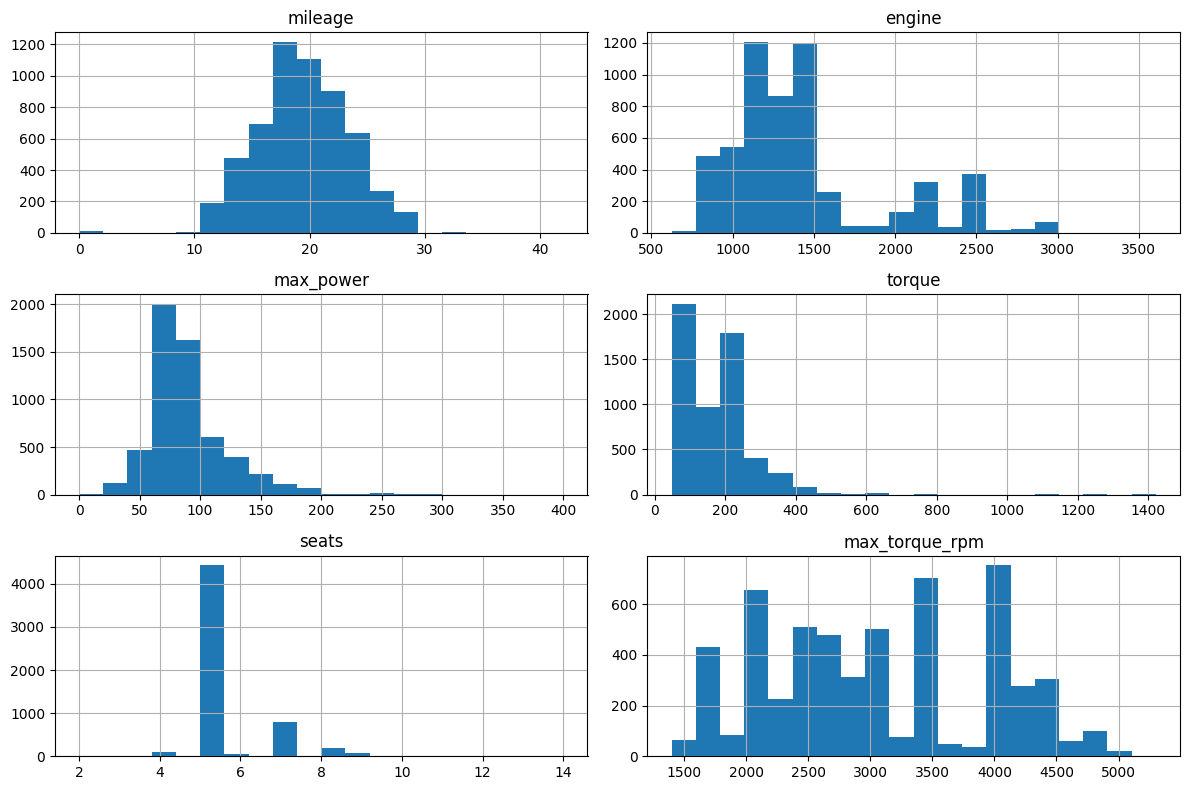

In [19]:
%matplotlib inline

df_train[df_train.columns[df.isna().any()].tolist()].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

*Примечание:* Так как имеем несколько экземпляров одной и той же модели, пропуски и нули для трейна и для теста, в первую очередь, заполняем медианой по этой модели. А вот оставшиеся, медианой по ряду тренировочной выборки.

In [22]:
with open('train_medians.pkl', 'wb') as f:
    pickle.dump(df_train.select_dtypes(exclude='object').median(), f)

In [19]:
# your code here
for df in [df_train, df_test]:
    for col in df.columns[df.isna().any()].tolist() + ['mileage']:
        model_medians = df.groupby('name')[col].median()
        df[col] = df.apply(lambda row: model_medians[row['name']] if (pd.isna(row[col])) or (row[col] == 0) else row[col], axis=1)
        df[col] = df[col].apply(lambda x: np.nan if x==0 else x) 
        df[col] = df[col].fillna(df_train[col].median())

*Примечание:* 
* Если распределение признаков нормальное или близкое к этому, мы могли бы использовать среднее для заполнения пропусков. В данном случае есть асимметричные смещения, поэтому использовать медиану, более устойчивую к выбросам, целесообразнее.
* Заполнение пропусков каждой выборки своей медианой, в данном случае, допустимо, так как не влечет к утечке целевого признака, а использует только статистику распределения этого признака. Однако, мы заполняем медианой из трейна, так как о характере тестовых данных заранее мы ничего не знаем. (Например, данные могут поступать построчно, и оценить медиану признака в котором есть пропуск мы не можем.)

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [20]:
# your code here
for df in [df_train, df_test]:
    df[['engine', 'seats']] = df[['engine', 'seats']].astype(int)

`Ответ:` Число сидений возможно рассмотреть как категориальный признак, так как он целочисленный и относится, скорее, к типам автомобилей. Например, применение бининга к нему, могло бы выделить категории автомобилей:
* 2-местные купе (чаще спорткары, дороже);
* 4-местные седаны;
* 5-местные универсалы (дороже, чем седаны) и т.д.


### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [21]:
for df in [df_train, df_test]:
    print(f'\t{df.attrs["Name"]}, по числовым столбцам:')
    display(df.describe())

	Тренировочная выборка, по числовым столбцам:


year  selling_price  ...        seats  max_torque_rpm
count  5840.000000   5.840000e+03  ...  5840.000000     5840.000000
mean   2013.428425   5.229601e+05  ...     5.430822     3037.703425
std       4.095622   5.354320e+05  ...     0.986816      881.516736
min    1983.000000   2.999900e+04  ...     2.000000     1400.000000
25%    2011.000000   2.500000e+05  ...     5.000000     2250.000000
50%    2014.000000   4.050000e+05  ...     5.000000     3000.000000
75%    2017.000000   6.400000e+05  ...     5.000000     4000.000000
max    2020.000000   1.000000e+07  ...    14.000000     5300.000000

[8 rows x 9 columns]

	Тестовая выборка, по числовым столбцам:


year  selling_price  ...        seats  max_torque_rpm
count  1000.000000   1.000000e+03  ...  1000.000000     1000.000000
mean   2013.681000   6.179010e+05  ...     5.403000     3098.776000
std       4.012149   7.585539e+05  ...     0.912921      879.228184
min    1995.000000   3.100000e+04  ...     4.000000     1500.000000
25%    2011.000000   2.500000e+05  ...     5.000000     2500.000000
50%    2014.000000   4.349990e+05  ...     5.000000     3000.000000
75%    2017.000000   6.700000e+05  ...     5.000000     4000.000000
max    2020.000000   6.000000e+06  ...     9.000000     5200.000000

[8 rows x 9 columns]

`Ответ:` Распределения практически не изменились, однако, это возможно, если пропуски составляют значительную часть датафрейма (десятки процентов).

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

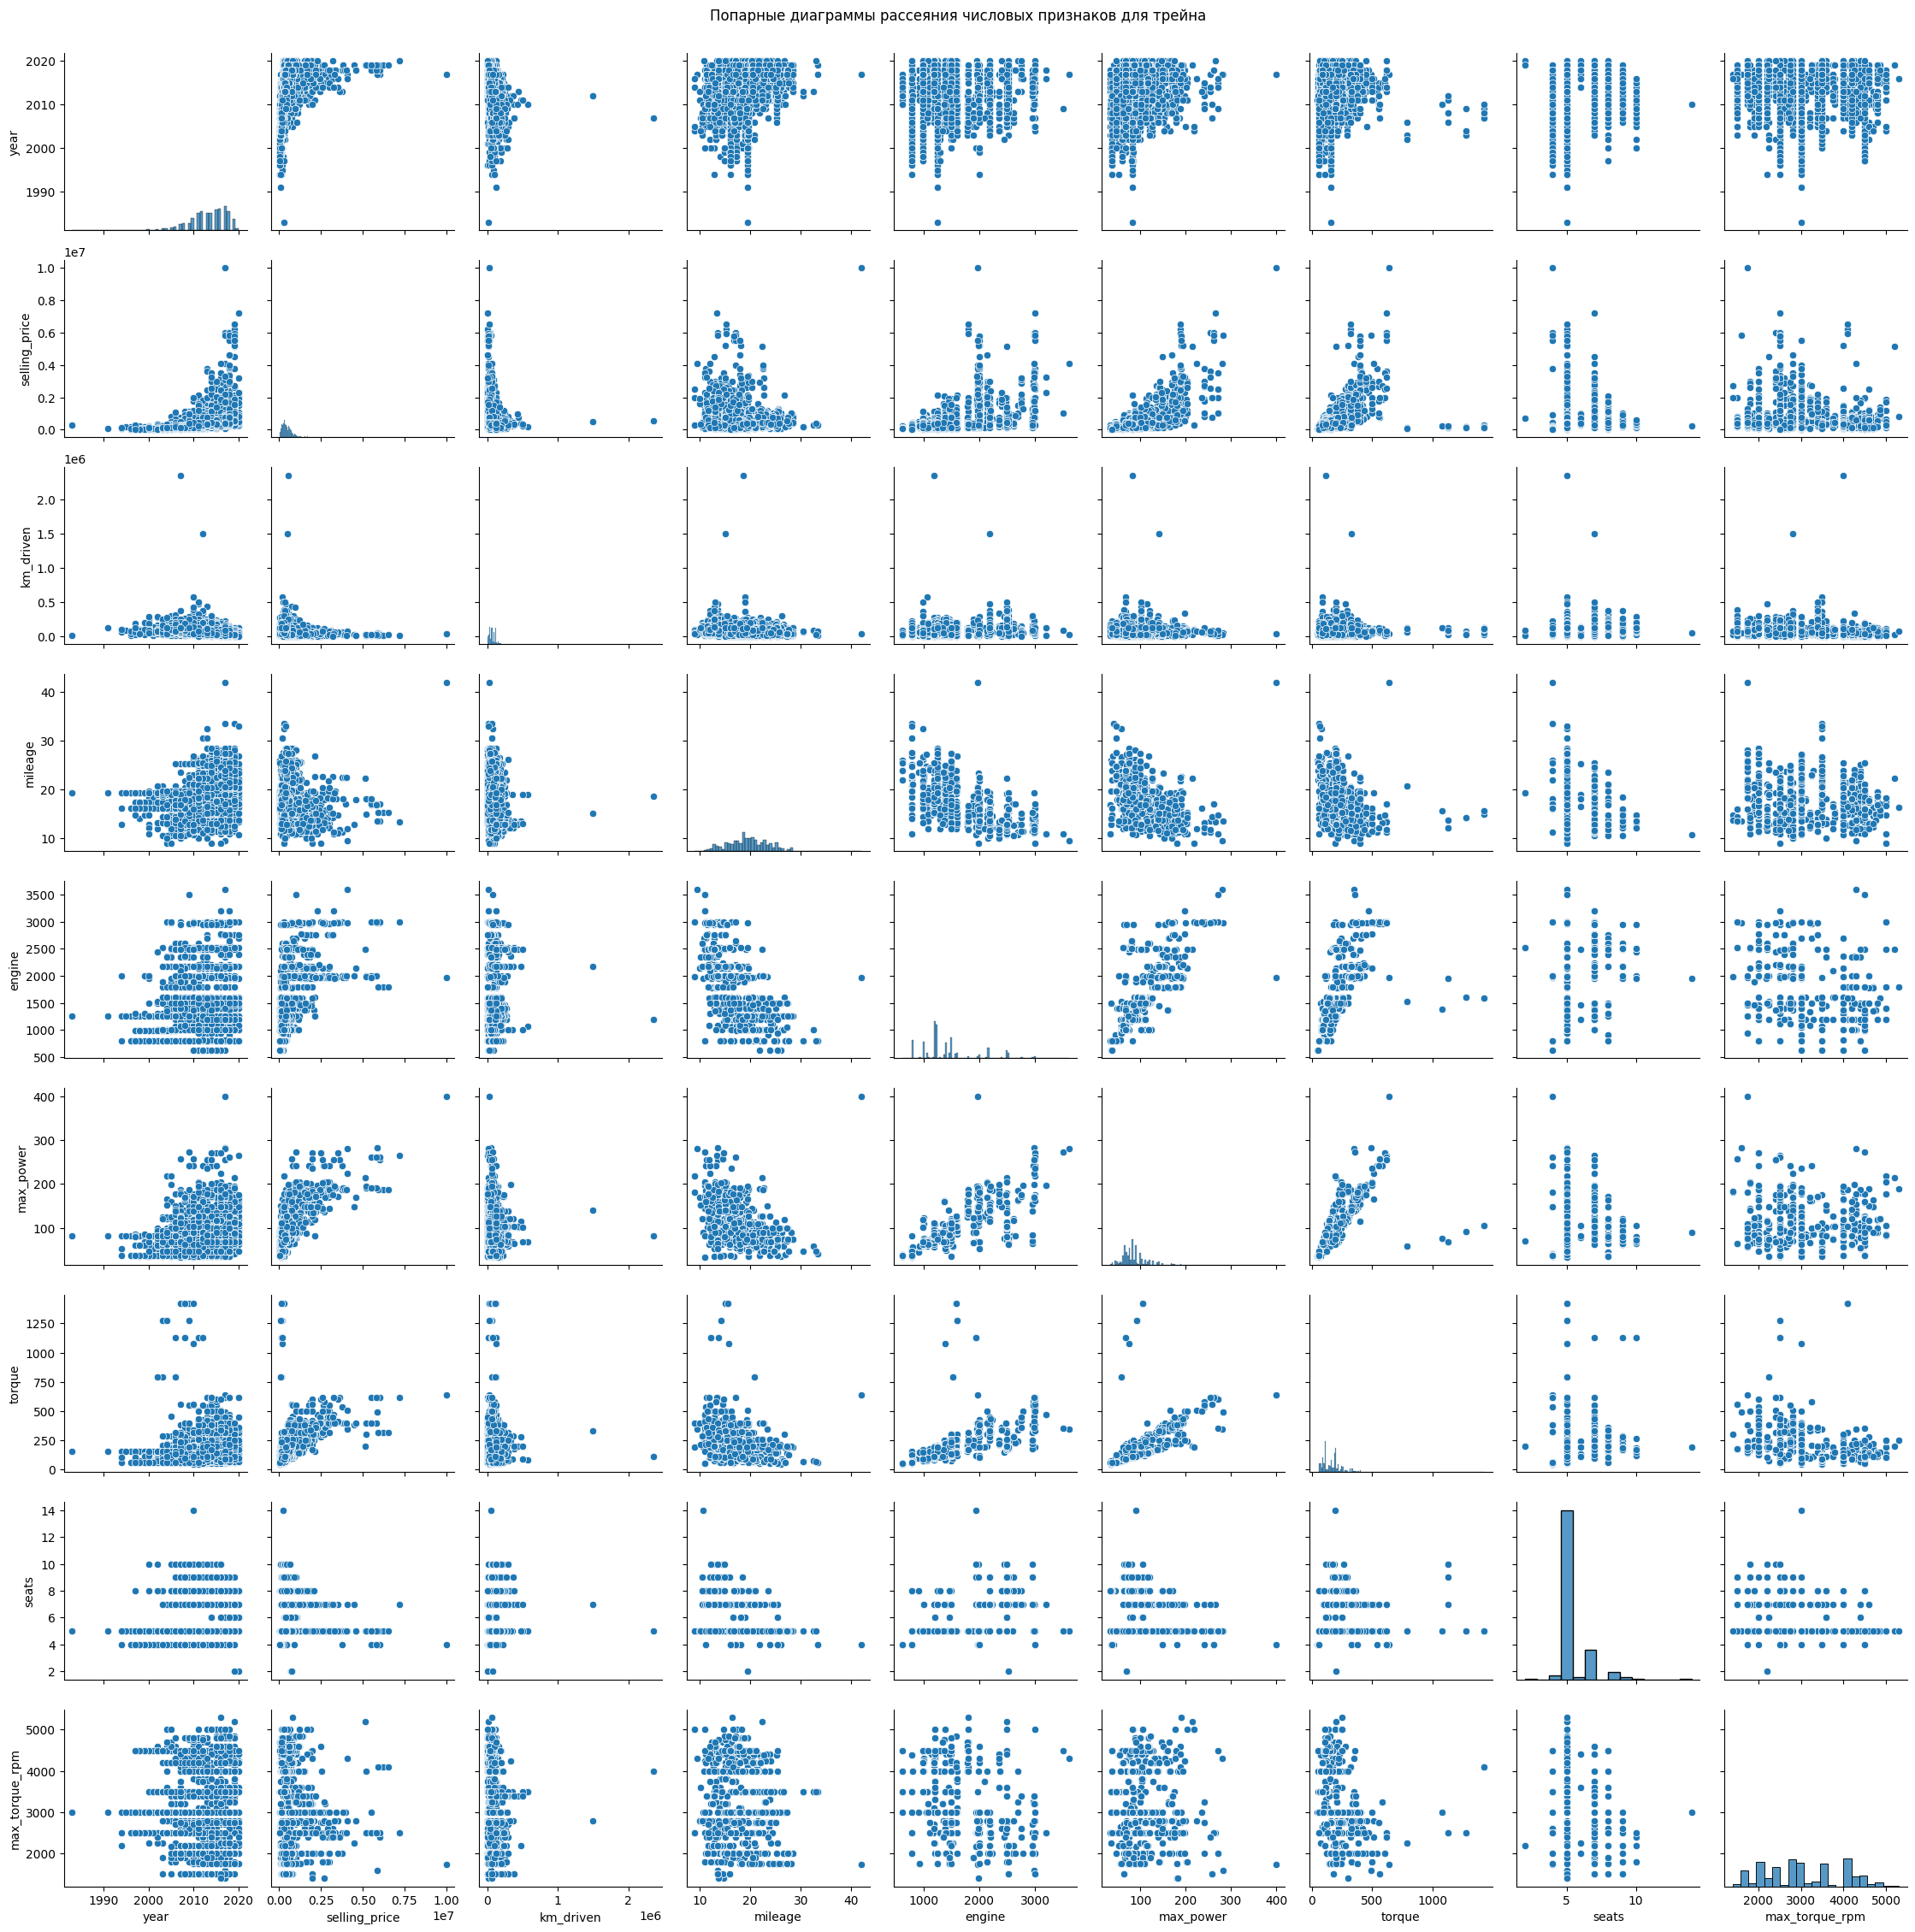

In [22]:
# your code here
sns.pairplot(df_train[df_train.select_dtypes(exclude='object').columns])
plt.suptitle("Попарные диаграммы рассеяния числовых признаков для трейна", y=1.002)
plt.tight_layout()
plt.show()

*`Для трейна:`*
* Наблюдается нелинейная зависимость selling_price от year, (возможна дополнительная генерация признаков);
* Наблюдается нелинейная зависимость selling_price от km_driven, (возможна дополнительная генерация признаков);
* Наблюдается заметная линейная зависимость selling_price от engine, max_power и torgue (диаграммы рассеяния имеют практически идентичный паттерн, возможно, эти признаки сильно коррелируют между собой).

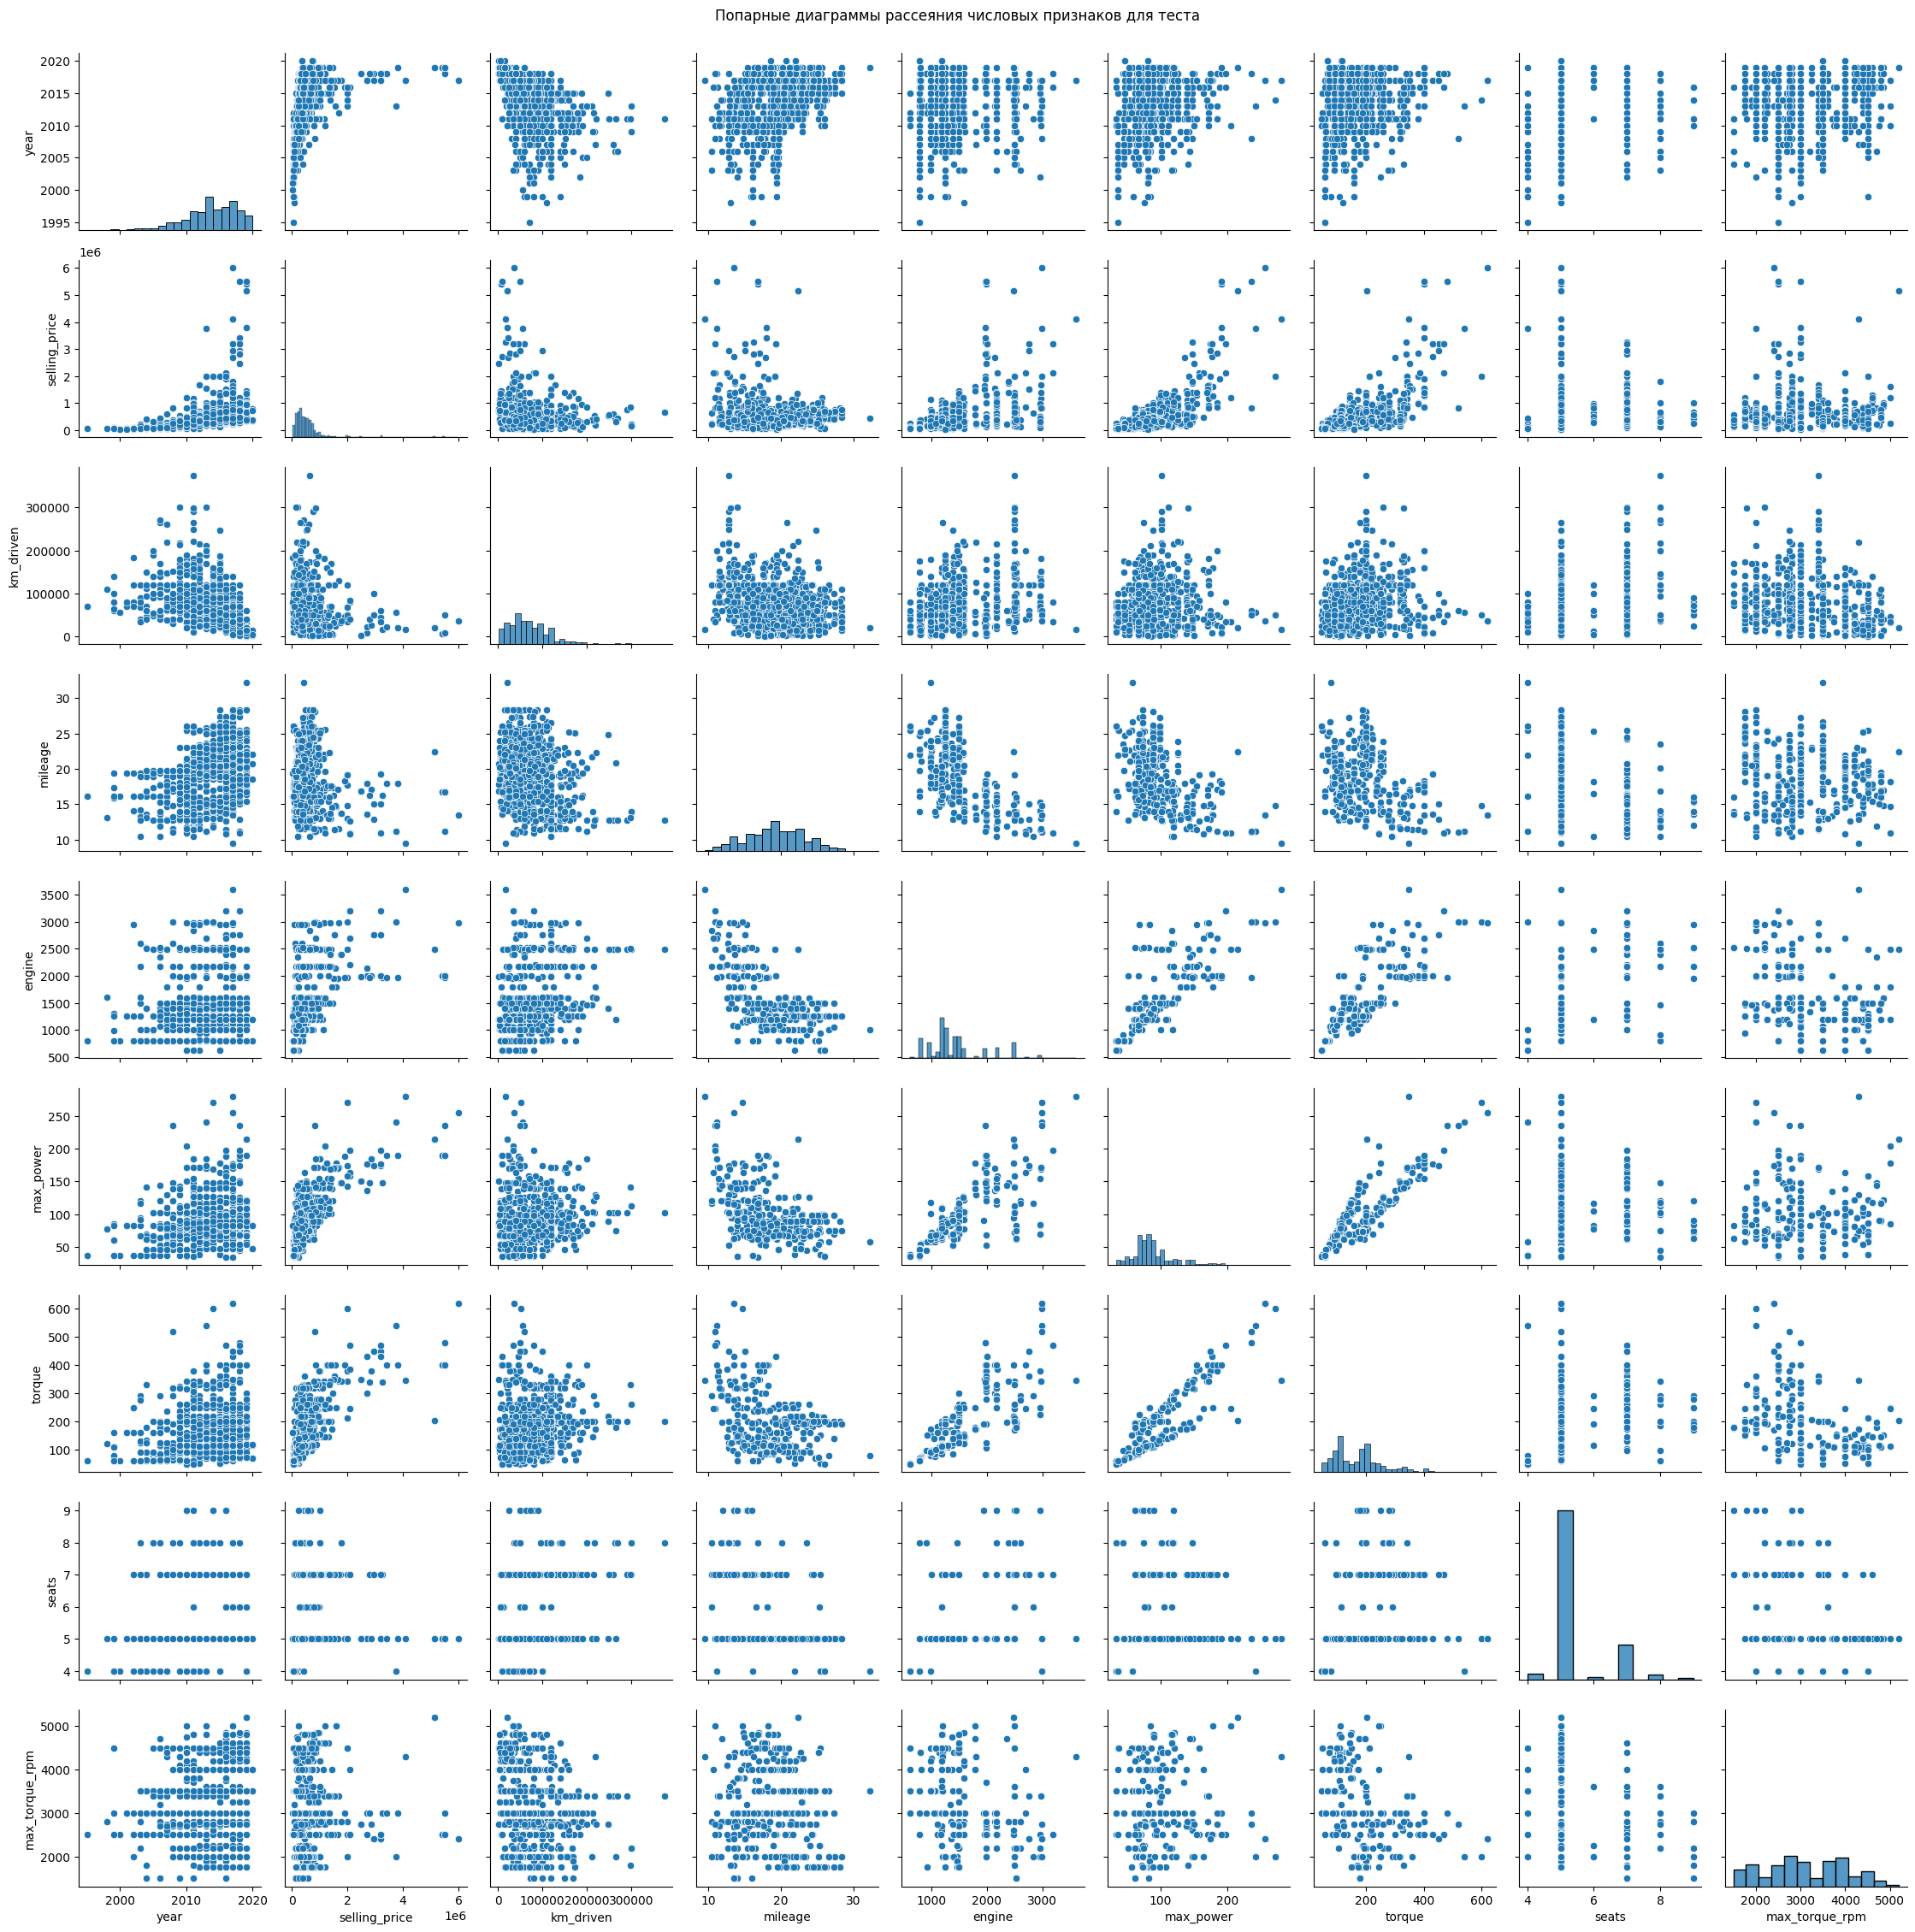

In [23]:
sns.pairplot(df_test[df_test.select_dtypes(exclude='object').columns])
plt.suptitle("Попарные диаграммы рассеяния числовых признаков для тeста", y=1.002)
plt.tight_layout()
plt.show()

*`Для теста:`* Распределения и зависимости (рисунки диаграмм рассеяния) для целевой переменной и по данным, в целом, практически аналогичны трейну.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

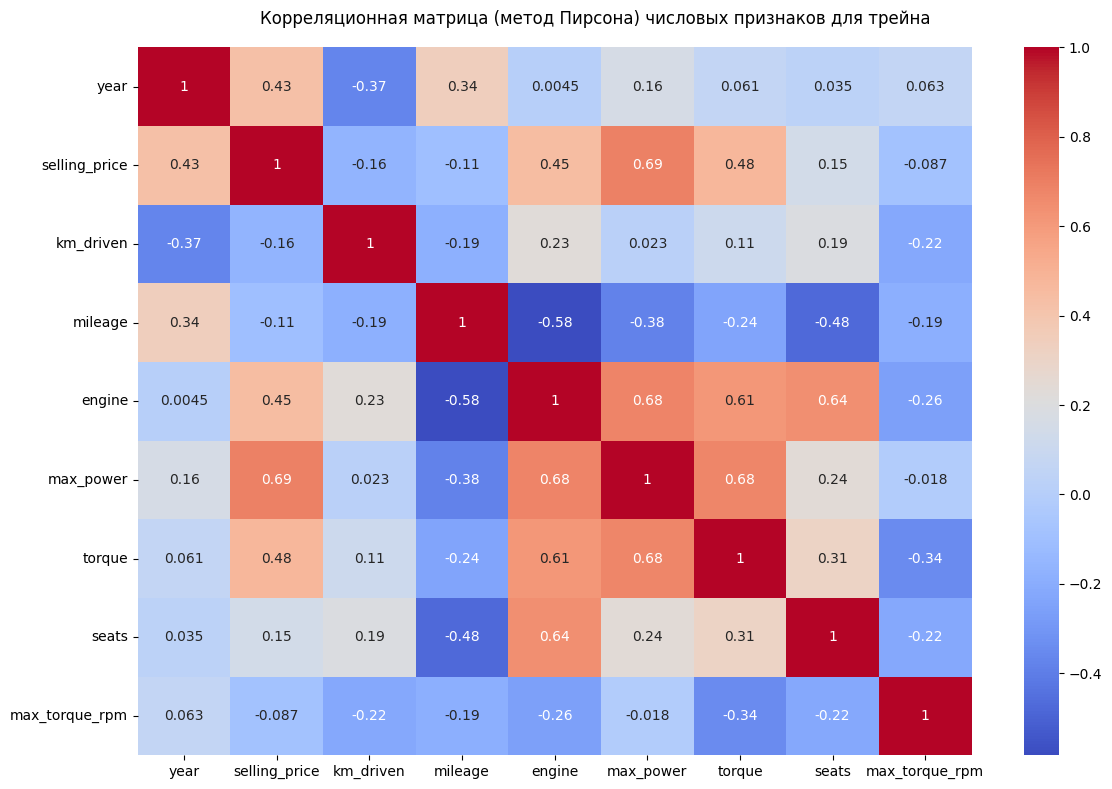

In [24]:
# your code here
corr_matrix_pearson = df_train.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_pearson, annot=True, cmap='coolwarm')
plt.suptitle("Корреляционная матрица (метод Пирсона) числовых признаков для трейна")
plt.tight_layout()
plt.show()

Найдем наименьшее значение, как адрес в развернутой матрице.

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

In [25]:
min_abs_value = corr_matrix_pearson.abs().min().min()

mask = corr_matrix_pearson.abs() == min_abs_value
print("Наименее скоррелированные:", mask.stack().idxmax())

Наименее скоррелированные: ('year', 'engine')


In [26]:
print('Наибольшая положительная взаимосвязь:')
display(corr_matrix_pearson.stack().loc[(corr_matrix_pearson.stack() > 0.6) & (corr_matrix_pearson.stack() < 1)].drop_duplicates())

Наибольшая положительная взаимосвязь:


selling_price  max_power    0.694238
engine         max_power    0.682849
               torque       0.610763
               seats        0.643508
max_power      torque       0.675277
dtype: float64

`Ответ:`
* Наименее скоррелированы между собой ('year', 'engine') - 0.0045;
* Сильная положительная зависимость (больше 0.6) у:
    - selling_price и max_power - 0.694238,
    - engine и max_power - 0.682849,
    - max_power и torque - 0.675277,
    - engine и seats - 0.643508,
    - engine и torque - 0.610763;
* Так как корреляция между km_driven и year есть и отрицательная (-0.37), то можно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.
* Для метода pd.Dataframe.corr(), можно указать аргумент method. Представлены методы поиска корреляции Кендалла, Спирмана и Пирсона. По умолчанию стоит метод Пирсона. 


### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


Корреляция Спирмена (формула для уникальных рангов)
$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$
* $d_i$ - разность между рангами двух переменных для i-го наблюдения
* $n$ - количество наблюдений

Общая развернутая формула
$$
\rho = \frac{\sum_{i=1}^n (R_{X_i} - \bar{R_X})(R_{Y_i} - \bar{R_Y})}{\sqrt{\sum_{i=1}^n (R_{X_i} - \bar{R_X})^2 \sum_{i=1}^n (R_{Y_i} - \bar{R_Y})^2}}
$$
* $R_{X_i}, R_{Y_i}$ - ранги i-го наблюдения
* $\bar R_X, \bar R_Y$ - средние значения рангов

In [27]:
# your code here
def spearman_manual(df: pd.DataFrame):

    cols = df.columns
    n = len(df)
    matrix = np.zeros((len(cols), len(cols)))
    
    # 1) Получаем ранги
    ranks = df.rank()
    
    # Потенциально можно ускорить в 2 раза если считать только один треугольник
    # Чтобы не запутаться, считаю "влоб"
    for i, col_i in enumerate(cols):
        for j, col_j in enumerate(cols):
            if i == j:
                # 2) Заполняем диагональ
                matrix[i, j] = 1.0 
                continue
            
            x = ranks[col_i].values
            y = ranks[col_j].values
            
            # 3) Если все n рангов являются различными целыми числами
            if len(np.unique(df[col_i])) == n and len(np.unique(df[col_j])) == n:
                d = x - y
                rho = 1 - (6 * (d ** 2).sum()) / (n * (n**2 - 1))
            else:
                # 4) Если ранги не уникальны (развернутая формула)
                mean_x = x.mean()
                mean_y = y.mean()
                cov = np.sum((x - mean_x) * (y - mean_y))
                std_x = np.sqrt(np.sum((x - mean_x)**2))
                std_y = np.sqrt(np.sum((y - mean_y)**2))
                if std_x > 0 and std_y > 0:
                    rho = cov / (std_x * std_y)
                else:
                    rho = 0
            
            matrix[i, j] = rho

    return pd.DataFrame(matrix, index=cols, columns=cols)

manual_corr = spearman_manual(df_train.select_dtypes(exclude='object'))
method_corr = df_train.select_dtypes(exclude='object').corr(method='spearman')

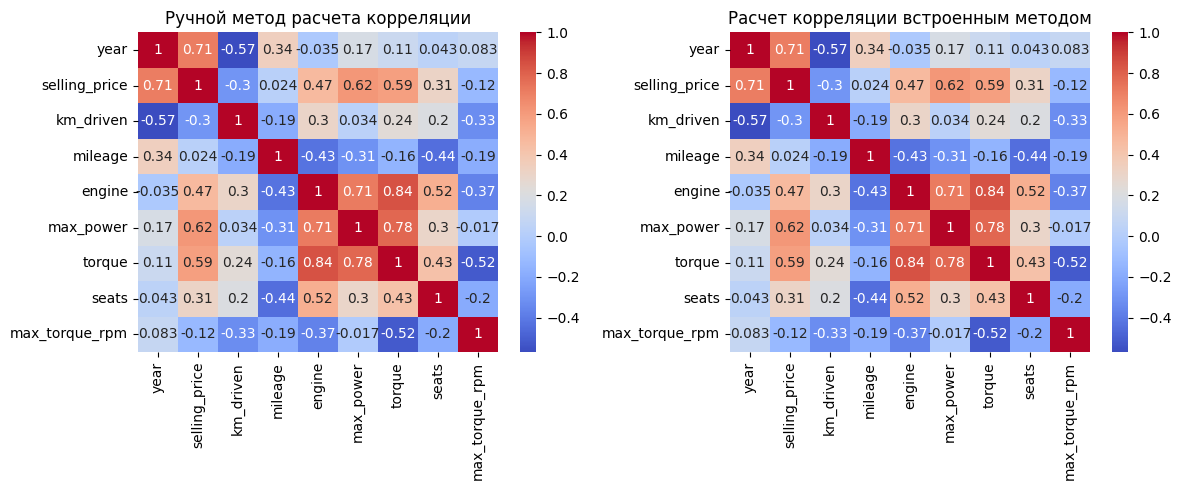

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(manual_corr, annot=True, ax=axes[0], cmap='coolwarm')
axes[0].set_title('Ручной метод расчета корреляции')
sns.heatmap(method_corr, annot=True, ax=axes[1], cmap='coolwarm')
axes[1].set_title('Расчет корреляции встроенным методом')
plt.tight_layout()
plt.show()

Сравним полученные значения с методом Пирсона на целевом признаке.

In [29]:
(
    pd.DataFrame({'pearson': corr_matrix_pearson['selling_price'], 'spearman': manual_corr['selling_price']}).T
    .style
    .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
    .format('{:.2f}')
 )

*`Вывод по корреляции Спирмена:`*
* Для признаков, зависимость которых визуально определяется как нелинейная при помощи pairplot, мы получаем значительно большие результаты относительно простой линейной зависимости (признаки year 0.71 против 0.43 и km_driven -0.3 против -0.16);
* Также получаем большую зависимость целевого признака от torque, seats и max_torque_rpm.

Так как $\phi_k$ использует для расчета корреляции $\chi^2$ статистику, для него категориальные признаки можно не исключать. Признак `name` ввиду большого числа его уникальных значений и незначительности для определения стоимости автомобиля по техническим характеристикам исключаем. Однако будем держать в уме его потенциал для создания дополнительных признаков.

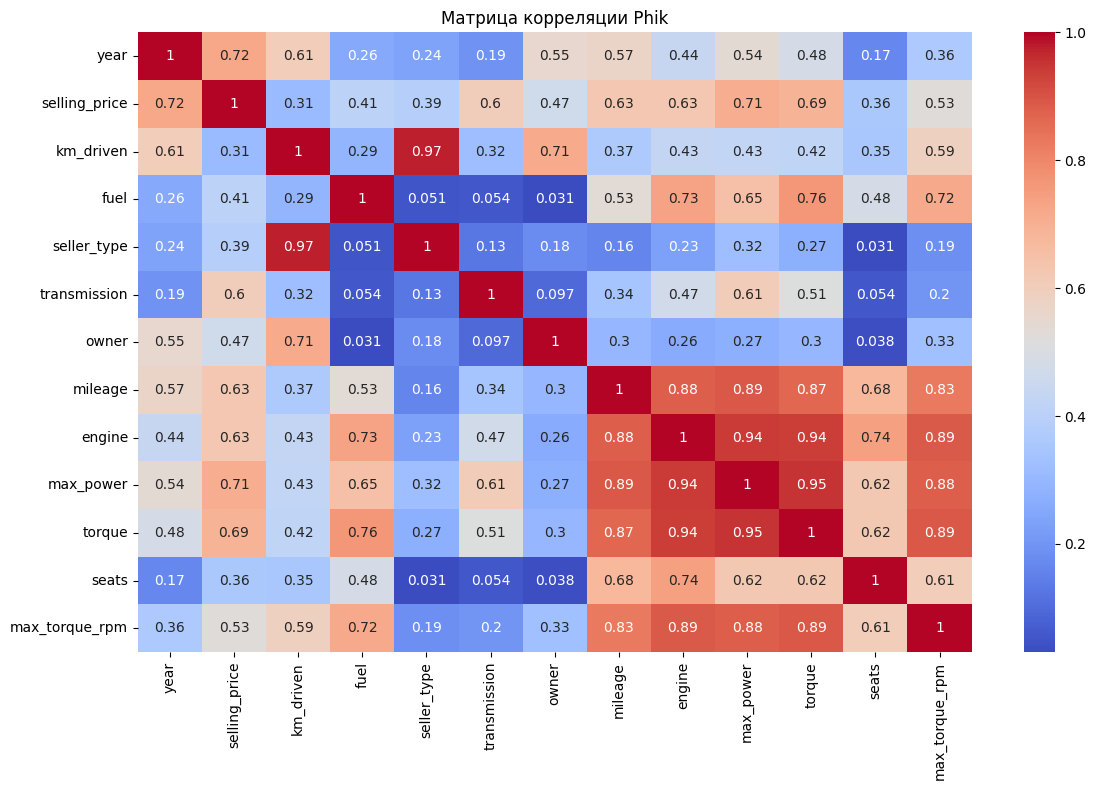

In [30]:
corr_matrix_phik = df_train.drop(columns='name').phik_matrix(
    interval_cols=['year', 'selling_price', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm'],
    bins=30,
    quantile=True
)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_phik, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции Phik')
plt.tight_layout()
plt.show()

*`Вывод по phik:`*
* Метод позволил нам оценить влияние категориальных признаков на целевой, все оказывают влияние, но наиболее значительные - это owner (0.47) и transmission (0.6);
* Из-за особенностей работы метода и распределения признака km_driven, phik при дефолтных параметрах плохо улавливает связь между этим признаком и целевым;
* Наблюдается некоторая мультиколлинеарность среди признаков max_power - engine - torque, они могут оказать влияние и на точность, и на интерпретируемость модели, это стоит учесть;
* После использования 3 методов определения корреляции, можно сказать, что явно бесполезных для определения целевого признаков нет. 

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

Проверим зависимость целевого признака selling_price от всех категориальных, преварительно прологарифмировав его для удобства визуализации.

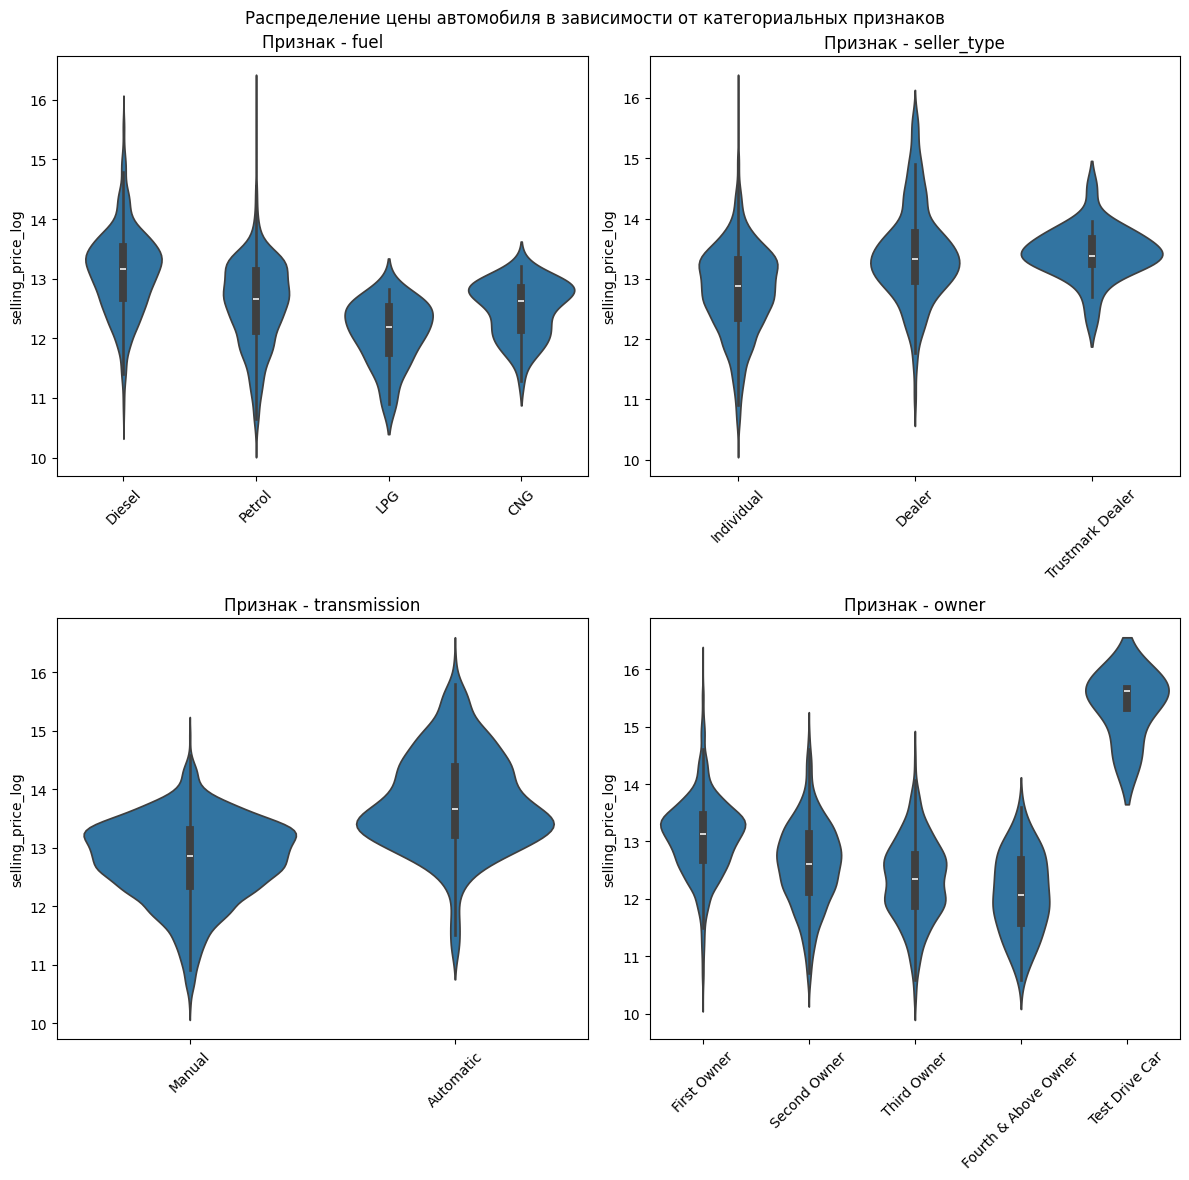

Число значений для:


owner
First Owner             3603
Second Owner            1639
Third Owner              454
Fourth & Above Owner     140
Test Drive Car             4
Name: count, dtype: int64

In [31]:
# your code here
df_visual = df_train.select_dtypes(include='object').drop(columns='name')
df_visual['selling_price_log'] = np.log(df_train['selling_price'])

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(df_visual.columns[:-1]):
    sns.violinplot(data=df_visual, x=col, y='selling_price_log', ax=axes[i])
    axes[i].set_title(f'Признак - {col}')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Распределение цены автомобиля в зависимости от категориальных признаков")
plt.tight_layout()
plt.show()

print('Число значений для:')
display(df_visual['owner'].value_counts())
del df_visual

*`Вывод по анализу влияния категориальных признаков на целевой:`*
* fuel - цена распределена для каждого типа похожим образом, возрастает в таком порядке: LPG - CNG - Petrol - Diesel;
* seller_type - разброс цен для individual и dealer больше чем у trustmark_dealer, а в среднем, дороже всего продает машины как раз trustmark_dealer;
* transmission - автомобили с автоматической коробкой передач дороже, признак оказывает заметное влияние;
* owner - за исключением Test Drive Car, цена уменьшается с увеличением числа владельцев.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

Так как в признаке max_torque_rpm всего 46 уникальных значений, также исключаем и его.

In [32]:
df_train_numeric = df_train.select_dtypes(exclude='object').copy()

y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns=['selling_price', 'year', 'max_torque_rpm'])

assert X_train.shape == (5840, 6)

In [33]:
df_test_numeric = df_test.select_dtypes(exclude='object').copy()

y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns=['selling_price', 'year', 'max_torque_rpm'])

assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

R2: 0.5676148871133859
MSE: 248547309920.17813


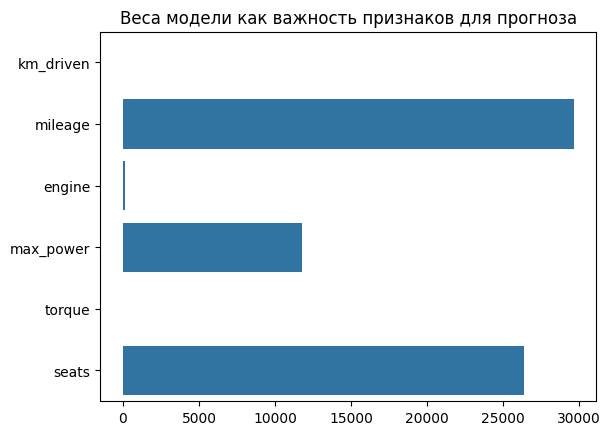

In [34]:
training_results = {}

def models_testing(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'R2: {r2_score(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    
    sns.barplot(y=X_test.columns, x=model.coef_, orient='h')
    # plt.xticks(rotation=90)
    plt.ylabel('')
    plt.title('Веса модели как важность признаков для прогноза')
    plt.show()

    return y_pred


base_model = LinearRegression()

y_pred = models_testing(base_model, X_train, y_train, X_test, y_test)
training_results['first_num_model'] = y_pred

*`Вывод по baseline модели:`*
* модель описывает 56% дисперсии целевой переменной на основе только вещественных признаков, что можно назвать неплохим результатом;
* MSE показывает огромное значение, в большей степени из-за того, что разброс целевой переменной в данных очень большой, а сами признаки не отмасштабированы;
* Веса полученной модели практически не дают интерпретировать важность признаков из-за разности масштабов.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

Коэффициент $R^2$ определяется следующим образом:

$$
R^2 = 1 - \frac{\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum\limits_{i=1}^{n} (y_i - \bar{y})^2}
$$

* $y_i$ - фактическое значение зависимой переменной;
* $\hat{y}_i$ - предсказанное моделью значение;
* $\bar{y}$ - выборочное среднее фактических значений.

In [35]:
r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2)
print(r2)

0.5676148871133859


### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

$$
R_{adj}^2 = 1 - (1 - R^2) \cdot \frac{n - 1}{n - p - 1}
$$

* $n$ - число объектов датафрейма;
* $p$ - число признаков датафрейма.

In [36]:
adj_r2 = 1 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)
print(adj_r2)

0.5650022882439805


*`Ответ:`* Так как коэффициент детерминации $R^2$ измеряет долю объясненной моделью дисперсии, а добавление нового признака увеличивает подгонку под данные, даже если сам признак не имеет никакого значения. $R_{adj}^2$ решает проблему бесконтрольного увеличения количества признаков, особенно, для бесполезных, так как сам $R^2$ они будут увеличивать незначительно, а штраф для метрики будет увеличиваться.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

R2: 0.5676148871133924
MSE: 248547309920.17438


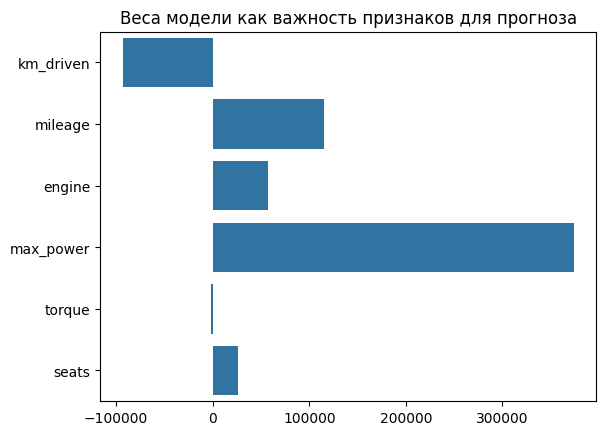

In [37]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

y_pred = models_testing(base_model, X_train_scaled, y_train, X_test_scaled, y_test);
training_results['scaled_num_model'] = y_pred

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

*`Вывод по результатам стандартизации признаков:`*
* Стандартизация действительно увеличила качество модели незначительно, однако теперь значение признаков по их весам соотносится с анализом корреляции;
* Теперь явно прослежиается отрицательная линейная зависимость между целевым признаком и km_driven;
* Наиболее информативный вещественный признак для предсказания - max_power.

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

R2: 0.567614247683452
MSE: 248547677482.76337


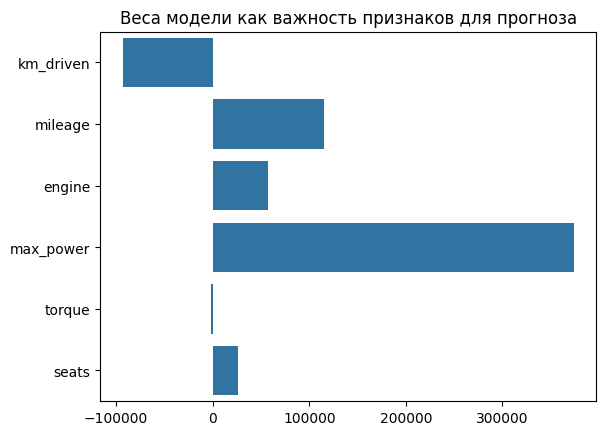

In [38]:
# your code here
lasso_model = Lasso(random_state=RANDOM_STATE)

y_pred = models_testing(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)
training_results['lasso_num_model'] = y_pred

In [39]:
print('Минимальный абсолютный вес:', np.abs(lasso_model.coef_).min())

Минимальный абсолютный вес: 1650.7727927620842


*`Вывод по результатам регуляризации`*: 
* Использование регуляризации практически не оказало влияние на качество модели;
* Использование L1 нормы весов не обнулило малозначимый (относительно остальных) признак torque, это могло произойти из-за недостаточно большого коэффициента (его дефолтного значения, определенного в классе LassoRegression, так как таргет принимает большие значения, веса могут принимать также большие значения) при сумме модулей весов в функции потерь.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [40]:
grid_search = GridSearchCV(
    estimator=Lasso(random_state=RANDOM_STATE),
    param_grid={'alpha': np.linspace(0.01, 10000, 50)},
    scoring=['r2', 'neg_mean_squared_error'],
    refit='neg_mean_squared_error',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая MSE:", -grid_search.best_score_)
print("Лучшая R2:", grid_search.cv_results_['mean_test_r2'].max())
print("Веса лучшей модели:", grid_search.best_estimator_.coef_)

Лучшие параметры: {'alpha': np.float64(3061.2314285714288)}
Лучшая MSE: 136189358511.54578
Лучшая R2: 0.49232089989142064
Веса лучшей модели: [-89902.87164209 107372.33129219  53250.30331129 370382.71527274
      0.          21627.137018  ]


R2: 0.5652683935186636
MSE: 249896141444.04715


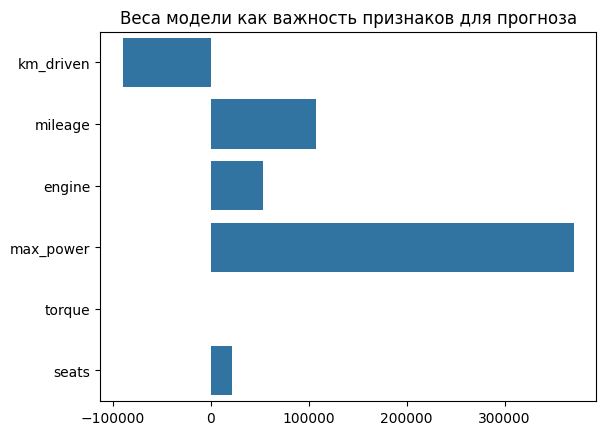

In [41]:
y_pred = models_testing(Lasso(**grid_search.best_params_, random_state=RANDOM_STATE), X_train_scaled, y_train, X_test_scaled, y_test)
training_results['lasso_best_num_model'] = y_pred

*`Ответ:`*
* Грид-серч обучил моделей по числу подбираемых параметров, в данном случае мы перебирали только параметр 'alpha' от 0.01 до 10000 в 50 шагов, всего 50 моделей;
* Параметры, которые использовали при подборе:
    - estimator - модель, параметры которой перебираем;
    - param_grid - сетка параметров для подстановки в формате словарь;
    - scoring - метрики, которые будем считать при подборе параметров;
    - refit - основная метрика, относительно которой будет выбрана лучшая модель;
    - cv - количество фолдов кросс-валидации;
    - число параллельных процессов при расчетах, -1 - использовать все доступные ядра.
* Лучший коэффициент регуляризации для данной последовательности - 3061, он занулил один из признаков модели.


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [42]:
grid_search = GridSearchCV(
    estimator=ElasticNet(random_state=RANDOM_STATE),
    param_grid={'alpha': np.linspace(0.01, 10000, 50), 'l1_ratio': np.linspace(0, 1, 11)},
    scoring=['r2', 'neg_mean_squared_error'],
    refit='neg_mean_squared_error',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая MSE:", -grid_search.best_score_)
print("Лучшая R2:", grid_search.cv_results_['mean_test_r2'].max())
print("Веса лучшей модели:", grid_search.best_estimator_.coef_)

Лучшие параметры: {'alpha': np.float64(3061.2314285714288), 'l1_ratio': np.float64(1.0)}
Лучшая MSE: 136189358511.54578
Лучшая R2: 0.49232089989142064
Веса лучшей модели: [-89902.87164209 107372.33129219  53250.30331129 370382.71527274
      0.          21627.137018  ]


R2: 0.5652683935186636
MSE: 249896141444.04715


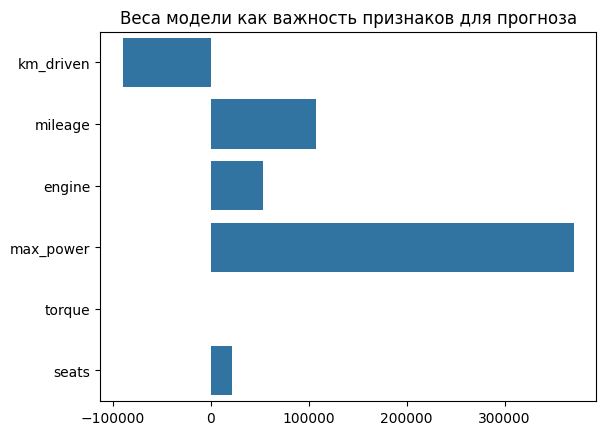

In [43]:
y_pred = models_testing(ElasticNet(**grid_search.best_params_, random_state=RANDOM_STATE), X_train_scaled, y_train, X_test_scaled, y_test)
training_results['elasticnet_best_num_model'] = y_pred

*`Ответ:`*:
* Грид-серчу пришлось обучить $50\cdot11=550$ моделей;
* Для лучшей модели параметр регуляризации alpha - 3061, соотношение коэффициентов l1_ratio - 1.0 (чистая l1 регуляризация).

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



Собираем класс для L0 нормированной линейной регрессии. Примечания:
* Частично класс собран при помощи генеративного ИИ (конструкции с отбором весов);
* Функционал относительно подобных классов типа Lasso и прочих сильно урезан (нет проверки области сходимости, параметра bias_ и прочего).

R2: 0.5564152998585807
MSE: 254985152485.60452


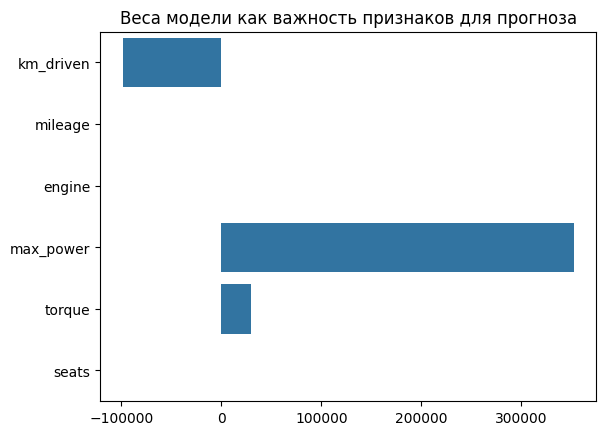

In [44]:
# your code here
class L0LinearRegression:
    def __init__(self, k, max_iter=1000, learning_rate=0.01):
        self.k = k
        self.max_iter = max_iter
        self.lr = learning_rate
        self.w = None
        self.coef_ = None

    def _hard_threshold(self, w, k):
        # Проверяем k и оставляем только самые значимые по модулю веса
        if k == 0:
            return np.zeros_like(w)
        abs_w = np.abs(w)
        threshold = np.sort(abs_w)[-k]
        mask = abs_w >= threshold
        w_new = w.copy()
        w_new[~mask] = 0
        return w_new

    def fit(self, X, y):
        # Добавляем смещение - bias
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        n, p = X.shape
        self.w= np.zeros(p)

        for _ in range(self.max_iter):
            # Шаг градиента
            y_pred = X @ self.w
            gradient = X.T @ (y_pred - y) / n
            w_new = self.w - self.lr * gradient

            # L0 норма - топ к по значению весов
            w_thresholded = self._hard_threshold(w_new, k=self.k)
            self.w = w_thresholded

        self.coef_ = self.w[:-1]
        return self

    def predict(self, X):
        # Отдаем предсказание
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        return X @ self.w
    
y_pred = models_testing(L0LinearRegression(k=4), X_train_scaled, y_train, X_test_scaled, y_test)
training_results['l0reg_num_model'] = y_pred

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [45]:
display(df_train['name'].sample(5))

4582               Mahindra Xylo D2 BS IV
177                Maruti Wagon R LXI CNG
167       Mahindra KUV 100 mFALCON G80 K8
3722    Ford Ecosport 1.5 Diesel Titanium
2339                      Maruti Ritz VDi
Name: name, dtype: object

Столбец name первым словом содержит название марки автомобиля, добавим его как новый признак.

In [46]:
df_train['brand'] = df_train['name'].str.split().str[0]
df_test['brand'] = df_test['name'].str.split().str[0]

In [47]:
df_train['brand'].unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

In [48]:
X_train_cat = df_train[df_train.select_dtypes(include='object').columns.to_list() + ['year', 'max_torque_rpm', 'seats']].copy()
X_train_cat = pd.concat([X_train_cat.drop(columns=['name']), X_train.drop(columns=['seats'])], axis=1)

X_test_cat = df_test[df_test.select_dtypes(include='object').columns.to_list() + ['year', 'max_torque_rpm', 'seats']].copy()
X_test_cat = pd.concat([X_test_cat.drop(columns=['name']), X_test.drop(columns=['seats'])], axis=1)

X_train_cat.head()

fuel seller_type transmission  ... engine max_power      torque
0  Diesel  Individual       Manual  ...   1248     74.00  190.000000
1  Diesel  Individual       Manual  ...   1498    103.52  250.000000
2  Diesel  Individual       Manual  ...   1396     90.00  219.668960
3  Petrol  Individual       Manual  ...   1298     88.20  112.776475
4  Petrol  Individual       Manual  ...   1197     81.86  113.750000

[5 rows x 13 columns]

In [49]:
# assert X_train_cat.shape == (5840, 11)

In [50]:
X_train_cat

fuel seller_type transmission  ... engine max_power      torque
0     Diesel  Individual       Manual  ...   1248     74.00  190.000000
1     Diesel  Individual       Manual  ...   1498    103.52  250.000000
2     Diesel  Individual       Manual  ...   1396     90.00  219.668960
3     Petrol  Individual       Manual  ...   1298     88.20  112.776475
4     Petrol  Individual       Manual  ...   1197     81.86  113.750000
...      ...         ...          ...  ...    ...       ...         ...
5835  Petrol  Individual       Manual  ...   1086     62.10   96.100000
5836  Petrol  Individual       Manual  ...    998     67.10   90.000000
5837  Petrol  Individual       Manual  ...   1197     82.85  113.700000
5838  Diesel  Individual       Manual  ...   1493    110.00  235.359600
5839  Diesel  Individual       Manual  ...   1248     73.90  190.000000

[5840 rows x 13 columns]

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [51]:
ct = ColumnTransformer(
    [("high_card", TargetEncoder(target_type="continuous"), ["brand", "year", "max_torque_rpm"]),
     ("categorial", OneHotEncoder(drop='first'), ["fuel", "seller_type", "transmission", "owner", "seats"]),
     ("numeric", StandardScaler(), ["km_driven", "mileage", "engine", "max_power", "torque"])])

X_train_transformed = ct.fit_transform(X_train_cat, y_train)
X_test_transformed = ct.transform(X_test_cat)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=ct.get_feature_names_out())
X_test_transformed = pd.DataFrame(X_test_transformed, columns=ct.get_feature_names_out())

X_train_transformed.shape

(5840, 26)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

*`Ответ:`*
* Для работы с OHE оцениваем число уникальных категорий признака и их общее число, если категорий, относительно общего числа признаков значительное количество - меняем кодировщик;
* Один столбец мы удаляем, чтобы избежать линейной зависимости новых признаков;
* Не совсем корректно, это может сильно осложнить интерпретацию результатов работы модели, также это вносит неопределенность какой признак является базовым, если один столбец мы удалили.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [52]:
grid_search = GridSearchCV(
    estimator=Ridge(random_state=RANDOM_STATE),
    param_grid={'alpha': np.linspace(0.001, 1000, 50)},
    scoring=['r2', 'neg_mean_squared_error'],
    refit='neg_mean_squared_error',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_transformed, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая MSE:", -grid_search.best_score_)
print("Лучшая R2:", grid_search.cv_results_['mean_test_r2'].max())
print("Веса лучшей модели:", grid_search.best_estimator_.coef_)

Лучшие параметры: {'alpha': np.float64(0.001)}
Лучшая MSE: 83607637896.31798
Лучшая R2: 0.7045638916540121
Веса лучшей модели: [ 6.28005673e-01  6.98968990e-01 -5.88721501e-02  8.02043538e+04
  1.73036478e+05  1.78942887e+04 -6.93869883e+04 -8.33589463e+04
 -1.26492526e+05 -4.17931219e+04 -3.54167937e+04  2.93039937e+06
 -2.30239114e+04  5.35781119e+05  1.08828205e+05 -6.88026021e+04
  1.88731626e+05  1.71742888e+05  1.95798007e+05  3.15924495e+05
  1.38319401e+05 -1.81078158e+04  3.41817756e+04 -5.78075058e+03
  2.14010288e+05  1.37963429e+04]


R2: 0.7646343092366418
MSE: 135294920068.34593


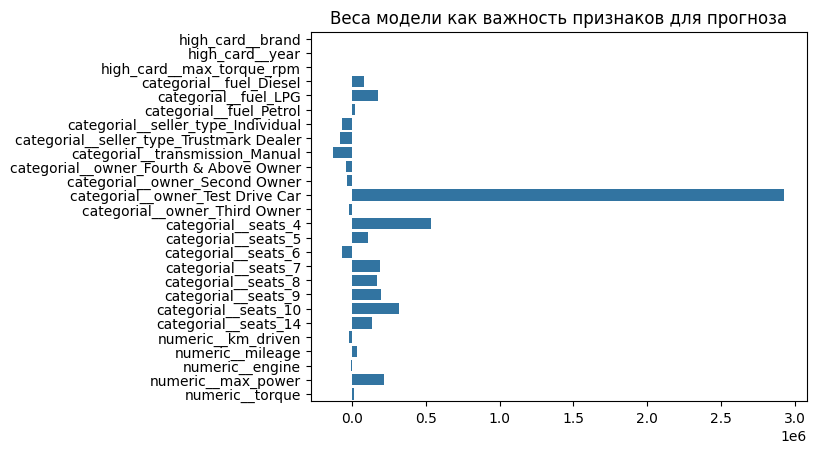

In [53]:
y_pred = models_testing(Ridge(**grid_search.best_params_, random_state=RANDOM_STATE), X_train_transformed, y_train, X_test_transformed, y_test)
training_results['ridge_all_model'] = y_pred

*`Ответ:`* Качество модели удалось улучшить, модель теперь объясняет 71 процент разброса целевого признака в грид-серче и 77 на тестовой выборке, а MSE относительно прогноза только на вещественных признаках уменьшилась почти на треть.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

## Признак name
### Тип кузова

Определим тип кузова автомобиля по его названию. Для этого я использовал LLM с поиском.

In [54]:
df_train_fe = df_train.copy()
df_test_fe = df_test.copy()

In [55]:
with open('cars.json', 'r') as f:
    cars = json.load(f)

df_train_fe['car_type'] = df_train_fe['name'].map(cars)
df_test_fe['car_type'] = df_test_fe['name'].map(cars)
df_train_fe['car_type'].unique()

array(['Sedan', 'Hatchback', 'SUV', 'Crossover', 'MPV', 'Microvan',
       'Compact MPV', 'Off-road', 'Hot Hatch', 'MUV', 'Notchback',
       'Liftback', 'Pickup', 'Station Wagon'], dtype=object)

### Премиальность бренда

Оценим объекты с большим значением целевого признака. Если число уникальных значений признака "brand" невысокое, создадим новый признак "premium", который будет обозначать премиальные бренды автомобилей, чья цена выше.

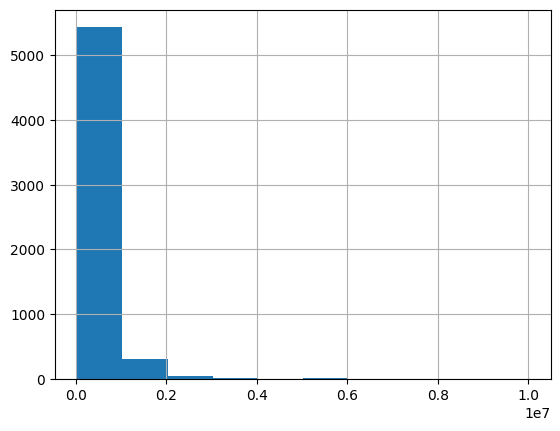

In [56]:
df_train_fe['selling_price'].hist();

In [57]:
df_train_fe[df_train_fe['selling_price'] > 3e6].describe(include='all')

name         year  ...  brand  car_type
count                                 45    45.000000  ...     45        45
unique                                30          NaN  ...     10         3
top     BMW 6 Series GT 630d Luxury Line          NaN  ...    BMW       SUV
freq                                   4          NaN  ...     16        25
mean                                 NaN  2017.600000  ...    NaN       NaN
std                                  NaN     1.643168  ...    NaN       NaN
min                                  NaN  2013.000000  ...    NaN       NaN
25%                                  NaN  2017.000000  ...    NaN       NaN
50%                                  NaN  2018.000000  ...    NaN       NaN
75%                                  NaN  2019.000000  ...    NaN       NaN
max                                  NaN  2020.000000  ...    NaN       NaN

[11 rows x 16 columns]

In [58]:
premium_brand = df_train_fe[df_train_fe['selling_price'] > 0.3e7]['brand'].unique()
premium_brand

array(['Audi', 'Lexus', 'Jaguar', 'Land', 'Mercedes-Benz', 'BMW', 'Volvo',
       'Ford', 'Jeep', 'Toyota'], dtype=object)

In [59]:
df_train_fe['premium'] = df_train_fe['brand'].map(lambda x: 1 if x in premium_brand else 0)
df_test_fe['premium'] = df_test_fe['brand'].map(lambda x: 1 if x in premium_brand else 0)

### Дополнительные числовые признаки

Переведем год производства автомобиля в возраст, взяв максимальный год из обоих датасетов. Также ряд признаков переводим в полиномиальные второй степени. Добавим признак "usage_ratio" который показывает число пройденных километров на год возраста автомобиля.

In [60]:
year_of_production = max(pd.concat([df_train_fe['year'], df_test_fe['year']]))

df_train_fe['age'] = year_of_production + 1 - df_train_fe['year']
df_test_fe['age'] = year_of_production + 1 - df_test_fe['year']

df_test_fe.drop(columns='year', inplace=True)
df_train_fe.drop(columns='year', inplace=True)

poly_features = ['age', 'torque', 'max_power', 'mileage', 'km_driven']
poly = PolynomialFeatures(degree=2, include_bias=False)

df_train_fe = pd.concat([
    df_train_fe.drop(columns=poly_features),
    pd.DataFrame(poly.fit_transform(df_train_fe[poly_features]), columns=poly.get_feature_names_out())], axis=1)
df_test_fe = pd.concat([
    df_test_fe.drop(columns=poly_features),
    pd.DataFrame(poly.fit_transform(df_test_fe[poly_features]), columns=poly.get_feature_names_out())], axis=1)

df_train_fe['usage_ratio'] = df_train_fe['km_driven'] / df_train_fe['age']
df_test_fe['usage_ratio'] = df_test_fe['km_driven'] / df_test_fe['age']

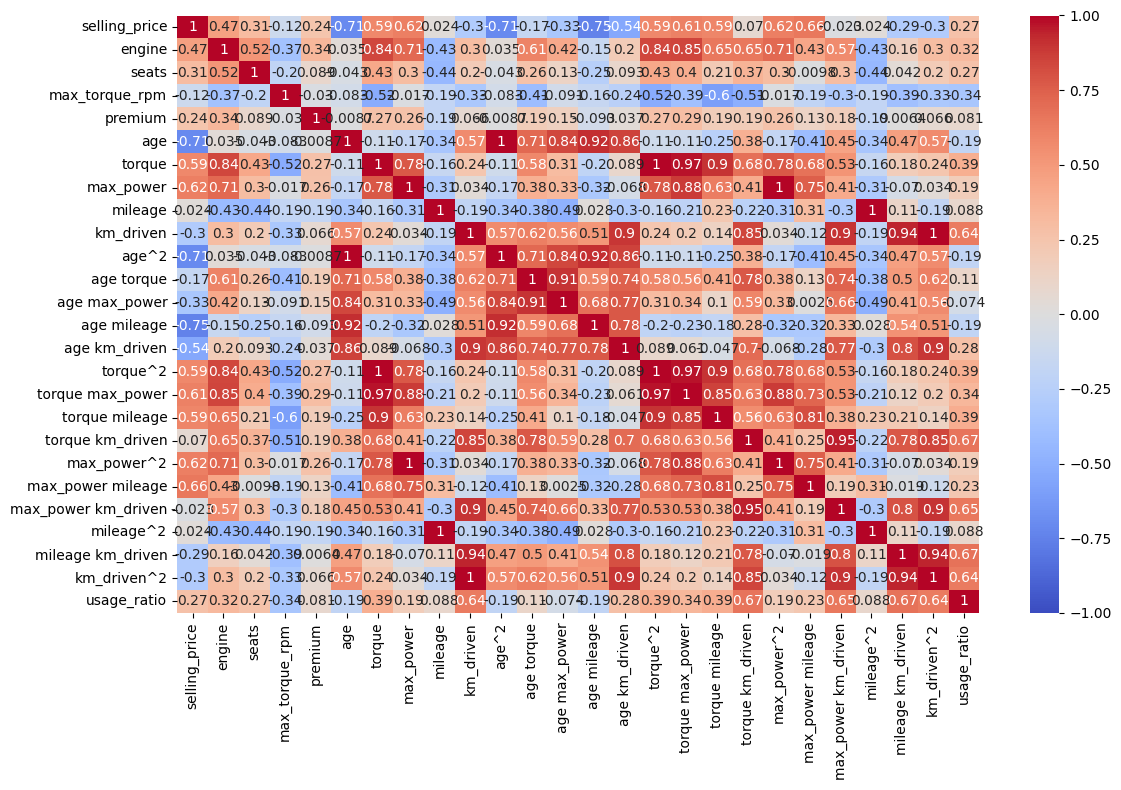

In [61]:
corr_matrix_fe = df_train_fe.select_dtypes(exclude='object').corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_fe, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

В итоге получаем большое число мультиколлинеарных признаков, их отбрасываем, учитывая их влияние на целевой.

In [62]:
def get_features_to_drop_multicollinearity(corr_matrix, target='selling_price', threshold=0.9):
    target_corr = corr_matrix[target].abs()
    
    to_drop = set()
    checked_pairs = set()
    
    for col1 in corr_matrix.columns:
        if col1 == target:
            continue
        for col2 in corr_matrix.columns:
            if col2 == target or col2 <= col1:
                continue
                
            pair = tuple(sorted([col1, col2]))
            if pair in checked_pairs:
                continue
            checked_pairs.add(pair)
            
            corr_value = corr_matrix.loc[col1, col2]
            if abs(corr_value) >= threshold:

                corr1_with_target = target_corr[col1]
                corr2_with_target = target_corr[col2]
                

                if corr1_with_target < corr2_with_target:
                    to_drop.add(col1)
                else:
                    to_drop.add(col2)
    
    to_drop.discard(target)
    
    return sorted(list(to_drop))

df_train_fe = df_train_fe.drop(columns=get_features_to_drop_multicollinearity(corr_matrix_fe))
df_test_fe = df_test_fe.drop(columns=get_features_to_drop_multicollinearity(corr_matrix_fe))

In [63]:
num_features = [
    'engine',
    'max_torque_rpm',
    'max_power',
    'mileage',
    'km_driven',
    'age max_power',
    'age mileage',
    'age km_driven',
    'torque max_power',
    'torque mileage',
    'torque km_driven',
    'max_power mileage',
    'usage_ratio'
]

In [64]:
ct = ColumnTransformer(
    [
     ("high_card", Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('target_encoder', TargetEncoder(target_type="continuous"))]), ["brand", "car_type"]),

     ("categorial", Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))]), ["fuel", "seller_type", "transmission", "owner", "seats", "premium"]),
      
     ("numeric", Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())]), num_features),

    ],
    remainder='drop'
)

X_train_transformed = ct.fit_transform(df_train_fe.drop(columns=['selling_price', 'name']), y_train)
X_test_transformed = ct.transform(df_test_fe.drop(columns=['selling_price', 'name']))

X_train_transformed = pd.DataFrame(X_train_transformed, columns=ct.get_feature_names_out())
X_test_transformed = pd.DataFrame(X_test_transformed, columns=ct.get_feature_names_out())

X_train_transformed.shape

(5840, 34)

In [65]:
grid_search = GridSearchCV(
    estimator=Ridge(random_state=RANDOM_STATE),
    param_grid={'alpha': np.linspace(0.001, 1000, 50)},
    scoring=['r2', 'neg_mean_squared_error'],
    refit='neg_mean_squared_error',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_transformed, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая MSE:", -grid_search.best_score_)
print("Лучшая R2:", grid_search.cv_results_['mean_test_r2'].max())
print("Веса лучшей модели:", grid_search.best_estimator_.coef_)

Лучшие параметры: {'alpha': np.float64(81.63357142857143)}
Лучшая MSE: 54824345964.330635
Лучшая R2: 0.8070922509309583
Веса лучшей модели: [ 4.79115828e-01  1.63587582e-01 -2.21863673e+04  1.06774560e+04
 -9.93472135e+02 -3.85081535e+04 -1.26944492e+04 -1.06430877e+05
 -5.13305364e+03 -2.84078120e+04  1.24660578e+05 -1.23894893e+04
  1.93359451e+04  3.31926927e+03 -7.91098619e+04  5.37295378e+03
  3.02696838e+04  2.89358527e+03  1.89903788e+04  1.68340391e+03
  3.12273715e+04  4.56671587e+04 -1.66340705e+04  1.42508681e+05
 -5.28298384e+04 -2.82528010e+04 -3.50246379e+05  9.64226670e+04
  9.61741836e+04  2.32970042e+05 -6.67791373e+04 -8.92785180e+04
  1.47538442e+05 -8.42949502e+02]


R2: 0.8625779347357556
MSE: 78994127288.69768


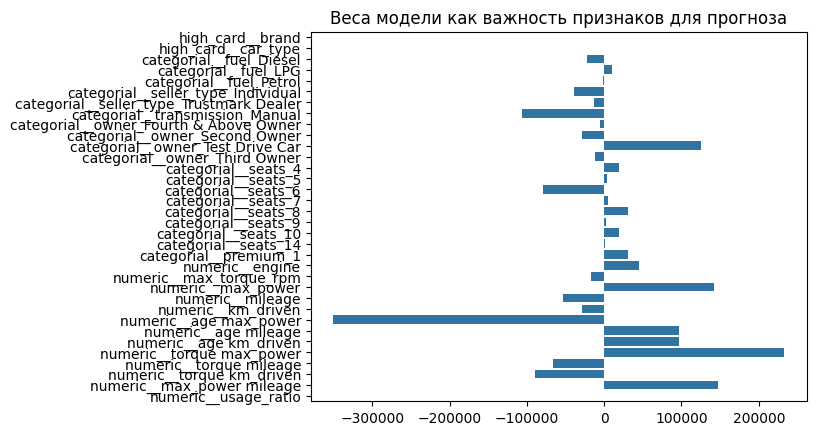

In [66]:
prime_model = Ridge(**grid_search.best_params_, random_state=RANDOM_STATE)
y_pred = models_testing(prime_model, X_train_transformed, y_train, X_test_transformed, y_test)
training_results['ridge_all_fe_model'] = y_pred

### Подготовка пайплайна к инференсу

*`Примечание:`* Использование модели с генерацией фич требует предобработки входных данных, требуемые фичи сохраним отдельным файлом.

In [67]:
prod_pipeline = Pipeline([
    ('ct', ct),
    ('ridge', Ridge(**grid_search.best_params_, random_state=RANDOM_STATE))
])

In [68]:
prod_pipeline.fit(df_train_fe.drop(columns=['selling_price', 'name']), y_train)

with open('model_pipeline.pkl', 'wb') as f:
    pickle.dump(prod_pipeline, f)

with open('required_features.pkl', 'wb') as f:
    pickle.dump(df_train_fe.drop(columns=['selling_price', 'name']).columns, f)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [68]:
def business_metrics(y_true, y_pred):
    return np.mean((np.abs(y_true - y_pred) / y_true <= 0.1))

for key, value in training_results.items():
    print(key, business_metrics(y_test, value))

first_num_model 0.193
scaled_num_model 0.193
lasso_num_model 0.193
lasso_best_num_model 0.185
elasticnet_best_num_model 0.185
l0reg_num_model 0.177
ridge_all_model 0.25
ridge_all_fe_model 0.282


*`Ответ:`* Лучше всего задачу бизнеса решает последняя модель с генерацией признаков.

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [69]:
def your_business_metrics(y_true, y_pred):
    # Доля недооценных объектов
    return np.mean(((y_true - y_pred) > 0))

for key, value in training_results.items():
    print(key, your_business_metrics(y_test, value))

first_num_model 0.531
scaled_num_model 0.531
lasso_num_model 0.531
lasso_best_num_model 0.539
elasticnet_best_num_model 0.539
l0reg_num_model 0.543
ridge_all_model 0.511
ridge_all_fe_model 0.505


*`Вывод:`* Полученная метрика оценивает долю недооцененных объектов моделью. Для лучшей модели полученной после генерации признаков, это значение очень близко к 0.5, что может говорить о равномерном распределение остатков предсказаний вокруг нуля.

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 25**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)